# ASEQUIBILIDAD ¿Pueden los hogares permitirse la compra de electricidad?

Sólo hay dos posibles catego- rizaciones de niveles. Los hoga- res con un costo de consumo su- perior al 5% de sus ingresos es- tán en el nivel 2, de lo contrario en el nivel 5.

### Clasificación MTF

## Categorización MTF 
 
Texto: Según los aparatos que disponga y haga uso el hogar, se clasifican estos siguiendo la matriz de evaluación del MTF. 
 
Imagen: Matriz Acceso a Servicios Electricos MTF

Grafica de python: MTF de asequibilidad

Offices/Regions

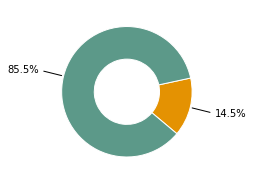

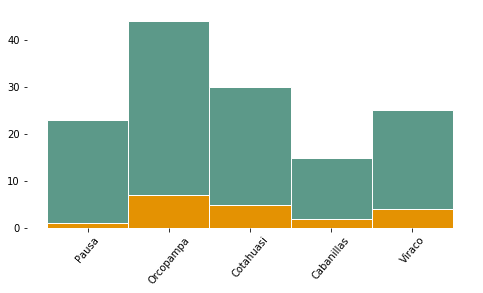

In [10]:
# load packages
import seaborn as sns
import os,sys
here = os.path.abspath('')
sys.path.insert(0, os.path.normpath(os.path.join(here, '../../src')))
import hedera_types as hedera
import odk_interface as odk
import mtf
from pivottablejs import pivot_ui

# load institution data
fondesurco = hedera.mfi(2)
odk_data_dir = '../../_datasets/DataODK/'
odk_survey_folder = ['PEPI_19_03_19/','PEPI_FONDESURCO_19_04_17/']
odk_data_name = [odk_data_dir + odk_survey_folder[0] + 'PEPI_results.csv',
                 odk_data_dir + odk_survey_folder[1] + 
                 'PEPI_FONDESURCO_2_results.csv']
fondesurco.gpsFile = '../../_datasets/Fondesurco/HederaGPS/All.txt'
fondesurco.data_client_file = '../../_datasets/Fondesurco/ClientDatabases/data_with_GPS_3.csv'
data = fondesurco.read_survey(odk_data_name)
fondesurco.HH = odk.households(data)

# get summaries of used sources, fuels, stoces
collection_overview = odk.overview(fondesurco.HH,[fondesurco])

sources_summary = odk.summary(collection_overview,hedera.keys().powerSources,
                              hedera.names('en').powerSources,
                              hedera.keys().powerSourcesColors)
stoves_summary = odk.summary(collection_overview,hedera.keys().stoves,
                             hedera.names('es').stoves,
                             hedera.keys().stovesColors)
fuels_summary = odk.summary(collection_overview,hedera.keys().fuels,
                              hedera.names('es').fuels,
                              hedera.keys().fuelsColors)

data_client_path = '../../_datasets/Fondesurco/ClientDatabases/data_with_GPSs_2.csv'
data_econ_act_path = '../../_datasets/Fondesurco/ClientDatabases/data_econ_activity.csv'
HH_all_client = fondesurco.merge_with_client_data(fondesurco.HH,
                                                  data_client_path,
                                                  data_econ_act_path)

# TO DO..
# update HH with HH database of institution
# fondesurco.merge_with_client_data(data_client_path,data_econ_act_path)


# plot MTF Affordability
fondesurco.tier_plots('E_Affordability')


In [11]:
hedera.keys().attributes_electricity


['E_Affordability',
 'E_Capacity',
 'E_Reliability',
 'E_Duration',
 'E_Legality',
 'E_Quality',
 'E_Safety',
 'E_Services',
 'E_Index',
 'PEPI_E_Affordability',
 'PEPI_E_Reliability']

## Fuentes de energía vs. asequibilidad 
 
Grafica de python: Number of HH in Tier 2 or 5 vs. source

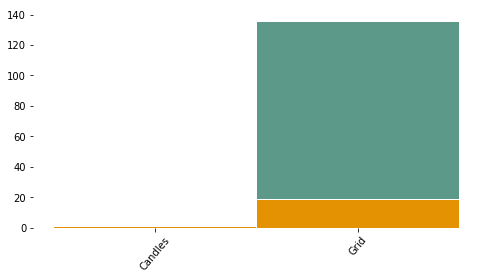

In [12]:

# affordability vs energy source
hedera.plot_stacked_tier_per_category(fondesurco.HH,'E_Affordability',
                                      sources_summary.used_keys,
                                      'primary_electricity_source',
                                      sources_summary.used_names)

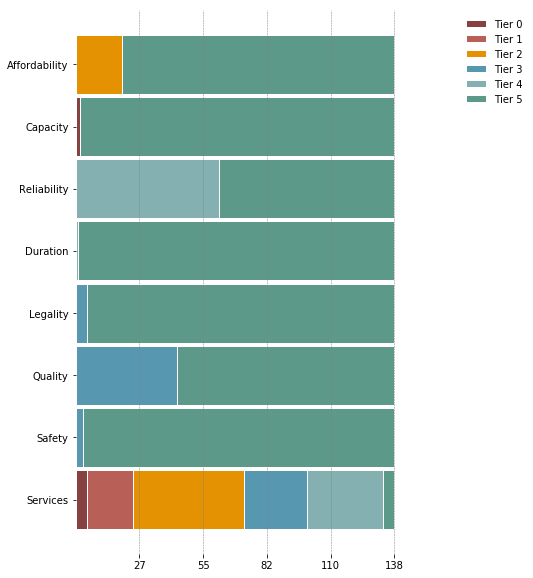

In [13]:
fondesurco.tier_barh(hedera.keys().attributes_electricity[0:8],
                     hedera.names('en').e_attributes[0:8],
                     figPath=None,
                     figName=None,
                     legend=True)

## Quintiles de ingreso vs. asequibilidad
 
Grafica de python: Quintile vs. asequibilidad

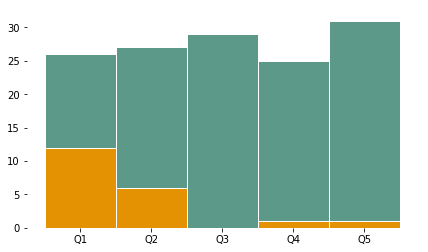

In [14]:
odk.plot_tiers_per_quintile(fondesurco.HH,'E_Affordability',figPath=None)

## Monto de crédito vs. asequibilidad
 


In [15]:
HH_df=HH_all_client.filter(['income','MONTO','energy_expenses', 'cooking_expenses', 'E_Index', 'C_Index'], axis=1)
HH_df.columns=['Ingresos', 'Monto crédito', 'Gastos energía', 'Gastos cocción', 'Nivel de accesso a energía', 'Nivel de accesso a cocción']
expenses=['Gastos energía','Gastos cocción']
tier_names=['Nivel de accesso a energía', 'Nivel de accesso a cocción']


HH_all_client.columns


Index(['DNI_x', 'date', 'duration', 'GPS_Latitude', 'GPS_Longitude',
       'locality', 'institution_id', 'income', 'household_survey',
       'electricity_survey', 'cooking_survey', 'primary_electricity_source',
       'secondary_electricity_source', 'energy_expenses', 'consumption',
       'primary_stove', 'primary_cooking_fuel', 'secondary_cooking_fuel',
       'secondary_stove', 'cooking_expenses', 'E_Affordability', 'E_Capacity',
       'E_Legality', 'E_Reliability', 'E_Quality', 'E_Duration', 'E_Safety',
       'E_Services', 'C_Affordability', 'C_Convenience', 'C_Availability',
       'C_Quality', 'C_Safety', 'E_Index', 'Minimum_Attributes_E_mult',
       'PEPI_E_Affordability', 'PEPI_E_Reliability', 'PEPI_E_Safety',
       'C_Index', 'PEPI_C_Affordability', 'Minimum_Attributes_C_mult',
       'PEPI_C_Availability', 'PEPI_C_Safety', 'HEDERA_ID', 'DNI_y',
       'Latitude', 'Longitude', 'FONDESURCO_ID', 'SOLICITUD', 'CODIGO CLIENTE',
       'CREDITO', 'NOMBRE', 'EDAD', 'GENERO', '

In [16]:
HH_all_client['MONTO']

0          NaN
70      2000.0
1          NaN
122     1000.0
99      2000.0
93      2000.0
83      1000.0
84      3000.0
121     1000.0
91      5000.0
118     1000.0
102     2000.0
113     2000.0
10     15000.0
24     11000.0
110     5000.0
75       500.0
46      3000.0
59     12000.0
26      3500.0
117     2500.0
125      500.0
23      6000.0
130     1000.0
51       600.0
86      3500.0
17      7000.0
128      600.0
39      3000.0
115      500.0
        ...   
8      10000.0
41     40000.0
61      1500.0
16      3000.0
85      1500.0
69      2000.0
97      1000.0
82      1500.0
105      300.0
100     4500.0
87      1000.0
90      1500.0
37      5000.0
34     12000.0
5      10000.0
62      6000.0
74       300.0
80      1115.0
89     20000.0
11     10000.0
68      3000.0
32      1000.0
73      3000.0
79       500.0
38      4500.0
7      19600.0
133     1000.0
114     1000.0
48      1500.0
76       500.0
Name: MONTO, Length: 136, dtype: float64

## Tipo de crédito vs. servicios
 
Grafica de python: Tipo de credito vs. asequibilidad
 

 
## Estado civil vs. servicios
 
Grafica de python: Estado civil vs. asequibilidad
 
## Género vs. servicios
 
Grafica de python: Estado civil vs. asequibilidad

##  TABLA INTERACTIVA

In [17]:
fondesurco.HH.columns

Index(['DNI', 'date', 'duration', 'GPS_Latitude', 'GPS_Longitude', 'locality',
       'institution_id', 'income', 'household_survey', 'electricity_survey',
       'cooking_survey', 'primary_electricity_source',
       'secondary_electricity_source', 'energy_expenses', 'consumption',
       'primary_stove', 'primary_cooking_fuel', 'secondary_cooking_fuel',
       'secondary_stove', 'cooking_expenses', 'E_Affordability', 'E_Capacity',
       'E_Legality', 'E_Reliability', 'E_Quality', 'E_Duration', 'E_Safety',
       'E_Services', 'C_Affordability', 'C_Convenience', 'C_Availability',
       'C_Quality', 'C_Safety', 'E_Index', 'Minimum_Attributes_E_mult',
       'PEPI_E_Affordability', 'PEPI_E_Reliability', 'PEPI_E_Safety',
       'C_Index', 'PEPI_C_Affordability', 'Minimum_Attributes_C_mult',
       'PEPI_C_Availability', 'PEPI_C_Safety'],
      dtype='object')

In [18]:
pivot_ui(fondesurco.HH)